In [1]:
import pandas as pd
import acquire
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats

In [2]:
def prep_iris():
    df = acquire.get_iris_data()
    cols_to_drop = ['species_id']
    df = df.drop(columns = cols_to_drop)
    df = df.rename(columns = {"species_name":"species"})
    df_dummies = df_dummies = pd.get_dummies(df[['species']], drop_first = True)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [7]:
def split_data(df):
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=322, 
                                        stratify=df.survived)
    train, validate = train_test_split(train_validate, test_size= 0.2,
                                       random_state = 322, stratify = train_validate.survived)
    return train, test, validate


def prep_titanic():
    titanic = acquire.get_titanic_data()
    titanic = titanic[~ titanic.embarked.isnull()]
    titanic = titanic[~ titanic.embark_town.isnull()]
    
    df_dummies = pd.get_dummies(titanic[['embark_town']], drop_first = True)
    
    titanic = pd.concat([titanic, df_dummies], axis = 1)
    
    
    cols_to_drop = ['passenger_id','pclass', 'embarked', 'deck', 'embark_town']
    titanic = titanic.drop(columns = cols_to_drop)
    
    train, test, validate = split_data(titanic)
    return train, test, validate


In [8]:
def impute(train, test, validate, my_strategy, column_list):
    
    imputer = SimpleImputer(strategy = my_strategy)
    
    imputer = imputer.fit(train[[column_list]])
    
    train[column_list] = imputer.transform(train[[column_list]])
    
    test[column_list] = imputer.transform(test[[column_list]]) 
    
    validate[column_list] = imputer.transform(validate[[column_list]])
    
    return train, test, validate


#### Getting prepped Iris data using the function that we had created

In [18]:
df = prep_iris()

In [19]:
df

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0
5,setosa,5.4,3.9,1.7,0.4,0,0
6,setosa,4.6,3.4,1.4,0.3,0,0
7,setosa,5.0,3.4,1.5,0.2,0,0
8,setosa,4.4,2.9,1.4,0.2,0,0
9,setosa,4.9,3.1,1.5,0.1,0,0


#### Splitting our data into train_validate and test data

In [20]:
train_validate, test = train_test_split(df, test_size = 0.10, random_state = 9, stratify = df['species'])

#### Checking the shape of our splitted data

In [21]:
train_validate.shape

(135, 7)

In [22]:
test.shape

(15, 7)

#### Splitting our train_validate into train dataset and validate data set

In [23]:
train, validate = train_test_split(train_validate, test_size = 0.10, random_state = 9, stratify = train_validate.species)

#### Checking the shape again

In [24]:
train.shape, validate.shape

((121, 7), (14, 7))

#### All of the work from here on now will be done using the train data set

In [25]:
a = train[['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

b= a.melt(id_vars = 'species')
b

,species,variable,value
0,setosa,sepal_length,5.0
1,setosa,sepal_length,4.3
2,virginica,sepal_length,6.8
3,versicolor,sepal_length,6.0
4,virginica,sepal_length,6.5
...,...,...,...
479,versicolor,petal_width,1.2
480,virginica,petal_width,1.5
481,setosa,petal_width,0.5
482,virginica,petal_width,2.4


<AxesSubplot:xlabel='variable', ylabel='value'>

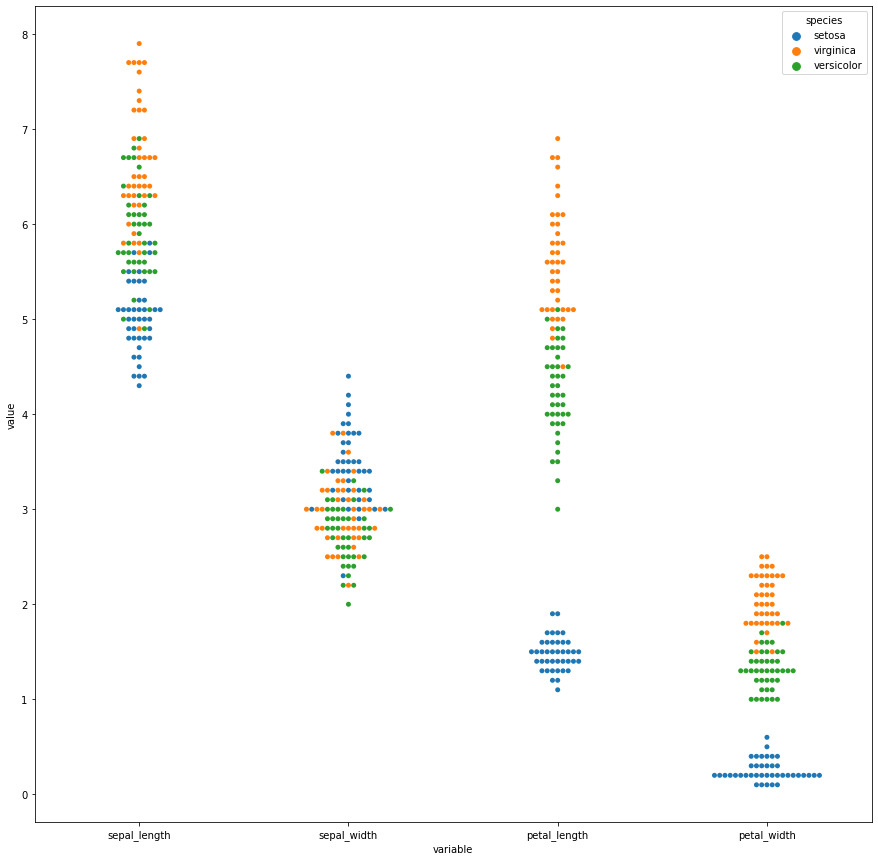

In [26]:
plt.figure(figsize = (15,15))
sns.swarmplot(data = b, x = 'variable', y = 'value', hue = 'species')

#### Takeaways:
   - Petal length and petal width can be used to easily classify between the species of the flower
   

In [27]:
x = train.melt(id_vars = 'species')

<AxesSubplot:xlabel='variable', ylabel='value'>

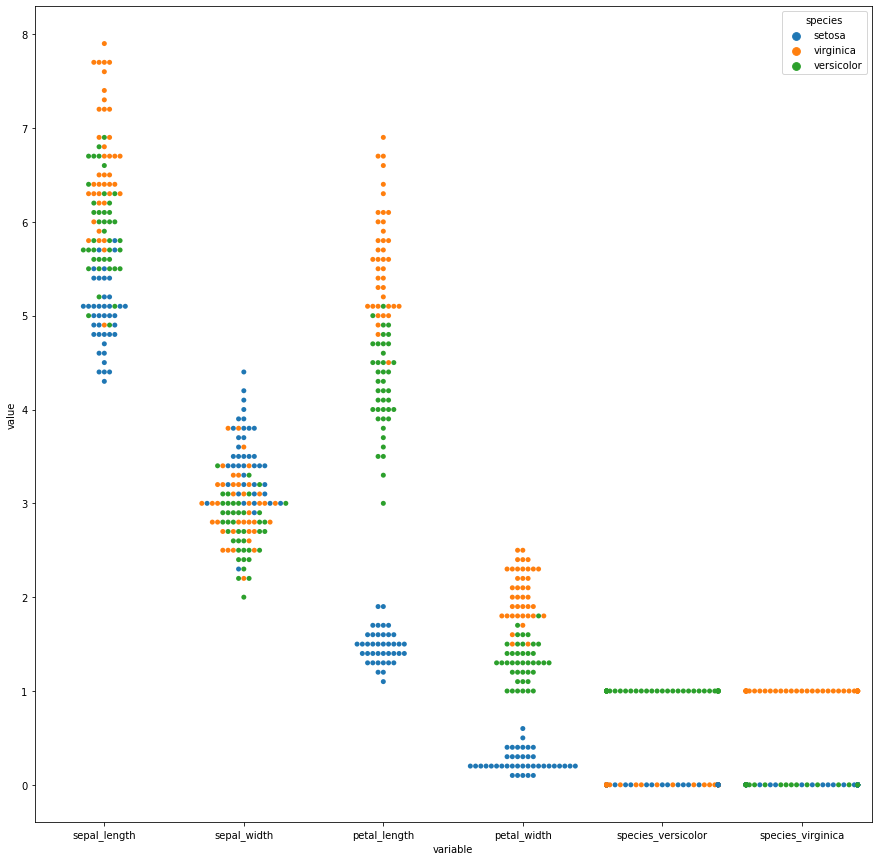

In [28]:
plt.figure(figsize = (15,15))
sns.swarmplot(data = x, x = 'variable', y = 'value', hue = 'species')

#### Creating subplot using matplotlib

TypeError: title() got multiple values for argument 'label'

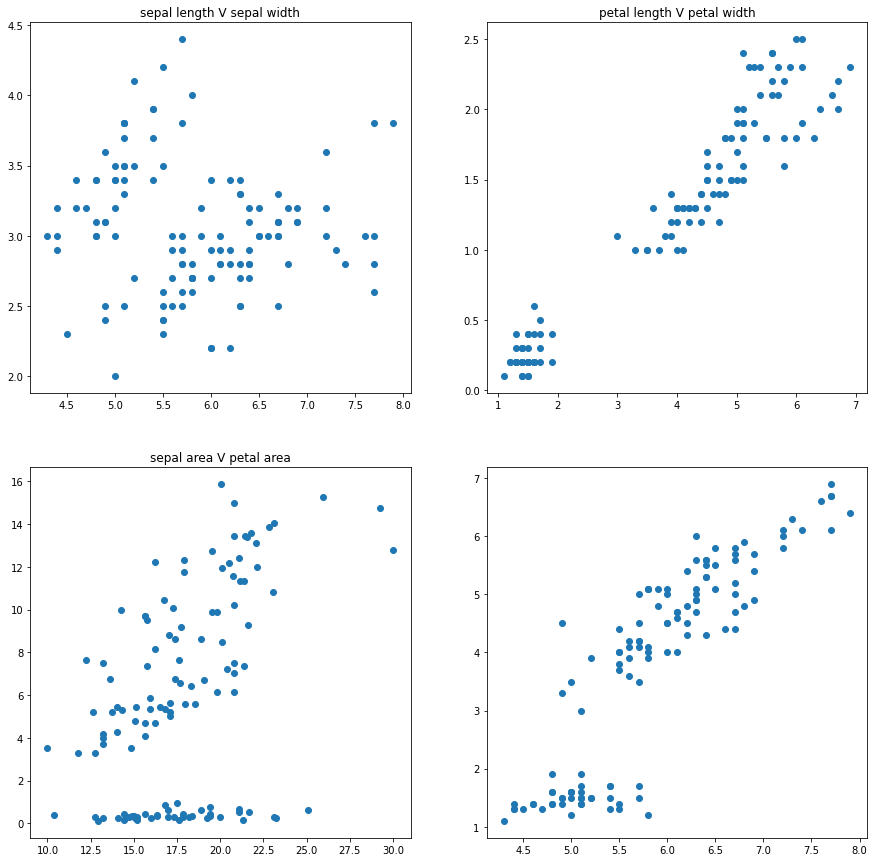

In [29]:
plt.figure(figsize = (15,15))

plt.subplot(2,2,1)
x = train.sepal_length
y = train.sepal_width
plt.scatter(x,y, label = 'species')
plt.title('sepal length V sepal width')

plt.subplot(2,2,2)
x = train.petal_length
y = train.petal_width
plt.scatter(x,y, label = 'species')
plt.title('petal length V petal width')


plt.subplot(2,2,3)
x = train.sepal_length * train.sepal_width
y = train.petal_width * train.petal_length
plt.scatter(x,y, label = 'species')
plt.title('sepal area V petal area')

plt.subplot(2,2,4)
x = train.sepal_length 
y = train.petal_length

plt.scatter(x,y)
plt.title('sepal length V petal length', label = 'species')
plt.labels()
plt.show()

In [ ]:
train['petal_area'] = train.petal_length * train.petal_width
train['sepal_area'] = train.sepal_length * train.sepal_width
fig, axs = plt.subplots(2,2, figsize = (12,12))
sns.scatterplot(ax = axs[0,0], data = train, x = 'sepal_length', y = 'sepal_width')
sns.scatterplot(ax = axs[0,1], data = train, x = 'petal_length', y = 'petal_width')
sns.scatterplot(ax = axs[1,0], data = train, x = 'sepal_length', y = 'petal_length')
sns.scatterplot(ax = axs[1,1], data = train, x = 'sepal_area', y = 'petal_area')

#### lets create subplot using seaborn

In [ ]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(train, col = 'species')
g.map(sns.scatterplot, "sepal_length", "sepal_width", alpha=1,color="#334488")

In [ ]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(train, col = 'species')
g.map(sns.scatterplot, "petal_length" , "petal_width", alpha=1,color="#334488")

In [ ]:
plt.figure(figsize = (15,10))
g = sns.FacetGrid(train, col = 'species')
g.map(sns.scatterplot, "petal_length" , "sepal_length", alpha=1,color="#334488")
plt.show()


#### lets try to get a better visual where we can compare all of this in the same plot

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(pd.crosstab(train.sepal_length, train.species).corr(), vmin = -1, cmap = 'coolwarm', annot = True)
# plt.figure(figsize = (10,10))
# sns.heatmap(x, annot = True)
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(train.corr(), vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

#### Create a scatter matrix visualizing interaction of each variable

In [ ]:
sns.pairplot(train, hue = 'species', vars = ['sepal_length', 'sepal_width', 'petal_length','petal_width', 'sepal_area', 'petal_area'])
plt.show()

#### Takeaways:
   - Petal length and petal width can be used to easily classify between the species of the flower

#### Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this

In [ ]:
sns.distplot(train.sepal_length) # our data seems to be normally distributed

In [ ]:
train.shape #  we have large enough sample

$H_0$: Mean_Sepal_Length_Virginica = Mean_Sepal_Length_Versicolor

$H_a$: Mean_Sepal_Length_Virginica != Mean_Sepal_Length_Versicolor

In [ ]:
df_vir = train[train.species == 'virginica'].sepal_length
df_ver = train[train.species == 'versicolor'].sepal_length

In [ ]:
# we will set our a to be 0.05
a = 0.05

In [ ]:
df_vir.var(), df_ver.var() # the variance is not significant

In [ ]:
t, p = stats.ttest_ind(df_vir, df_ver)
t, p 

In [ ]:
if p < a:
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")



In [ ]:
# This test result can be interpreted as that the sepal length of these two sepcies vary significantly. It is possibly
# an idication that we can differentiate between these two species solely based on their sepal lenght

## Classification Model Evaluation Class

- A model is an approximation of reality.
- We must at all time evaluate the performance of our model
- 